In [1]:
# Imports
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import gc
from IPython.display import display

# Sci-kit Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# NN
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Conv2D, MaxPooling2D

In [2]:
# Load file
df = pd.read_csv("all_merged_sw.csv", 
                 usecols=['post_id', 'date', 'sw_12_num_comments', 'sw_12_score', 'sw_12_total_awards',
                          'author_commentkarma', 'sw_12_compound_score', 'author_id', 'author_name',
                          'ticker', 'post_type', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
                          'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X', 
                          'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
                          'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
                          'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
                          'adjclose_1_X', 'adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                          'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y',
                          'adjclose_9_Y', 'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y',
                          'adjclose_13_Y', 'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                          'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y',
                          'adjclose_21_Y'])

df

,post_id,date,author_commentkarma,author_id,author_name,ticker,post_type,adjclose_20_X,adjclose_19_X,adjclose_18_X,...,adjclose_16_Y,adjclose_17_Y,adjclose_18_Y,adjclose_19_Y,adjclose_20_Y,adjclose_21_Y,sw_12_num_comments,sw_12_score,sw_12_total_awards,sw_12_compound_score
0,ed1i6xt,2019-01-01,1855.0,a36tf,gundeck925,CONE,comment,52.026543,51.579323,50.899178,...,47.221077,46.967300,49.223080,49.345276,50.144196,50.943123,2.000000,9.000000,0.000000,0.202300
1,ed0rsq9,2019-01-01,8101.0,54sdn,turbotoast,CACC,comment,410.399994,412.209991,403.850006,...,405.570007,409.929993,411.890015,408.670013,414.369995,398.019989,1.000000,3.000000,0.000000,0.458800
2,ed149cc,2019-01-01,234162.0,6lvmmbl,Shmokesshweed,WSBC,comment,38.873425,39.189323,38.214558,...,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271,9.400000,9.800000,0.000000,-0.082100
3,ed0rg2j,2019-01-01,744.0,2dk1wq99,nightman_123,WSBC,comment,38.873425,39.189323,38.214558,...,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271,9.400000,9.800000,0.000000,-0.082100
4,abjmvm,2019-01-01,744.0,2dk1wq99,nightman_123,WSBC,submission,38.873425,39.189323,38.214558,...,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271,9.400000,9.800000,0.000000,-0.082100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940780,ghmym1x,2020-12-31,4431.0,vh0ilgz,MerganzerMunson,ADES,comment,5.650000,6.020000,5.830000,...,5.440000,5.500000,5.250000,5.190000,5.070000,5.120000,4.911765,20.029412,1.117647,0.085724
940781,ghmym1x,2020-12-31,4431.0,vh0ilgz,MerganzerMunson,JAN,comment,4.270000,4.500000,4.620000,...,5.230000,6.450000,9.520000,12.990000,9.010000,9.400000,4.102564,20.367521,0.538462,0.241862
940782,ghmynsf,2020-12-31,4431.0,vh0ilgz,MerganzerMunson,FEYE,comment,15.030000,15.360000,15.120000,...,22.100000,21.660000,21.360001,21.150000,21.000000,21.590000,4.005236,27.465969,0.193717,0.107613
940783,ghmiiu6,2020-12-31,22288.0,bgruy,DeadSol,WSBC,comment,28.073952,29.172199,29.535013,...,31.255468,30.720339,28.926668,29.550983,28.738380,29.313148,55.112248,34.933042,0.112248,0.056546


In [3]:
# Print the colum names
df.columns.values

array(['post_id', 'date', 'author_commentkarma', 'author_id',
       'author_name', 'ticker', 'post_type', 'adjclose_20_X',
       'adjclose_19_X', 'adjclose_18_X', 'adjclose_17_X', 'adjclose_16_X',
       'adjclose_15_X', 'adjclose_14_X', 'adjclose_13_X', 'adjclose_12_X',
       'adjclose_11_X', 'adjclose_10_X', 'adjclose_9_X', 'adjclose_8_X',
       'adjclose_7_X', 'adjclose_6_X', 'adjclose_5_X', 'adjclose_4_X',
       'adjclose_3_X', 'adjclose_2_X', 'adjclose_1_X', 'adjclose_2_Y',
       'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y', 'adjclose_6_Y',
       'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
       'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y', 'adjclose_14_Y',
       'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y', 'adjclose_18_Y',
       'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y',
       'sw_12_num_comments', 'sw_12_score', 'sw_12_total_awards',
       'sw_12_compound_score'], dtype=object)

In [4]:
# Find the min and max at 1-4 business week intervals
df['5day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmin(axis=1)

df['10day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmin(axis=1)

df['15day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmin(axis=1)

df['20day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmin(axis=1)

df['5day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmax(axis=1)

df['10day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmax(axis=1)

df['15day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmax(axis=1)

df['20day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmax(axis=1)

# Extract the day number and convert to int
df['5day_min'] = df['5day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_min'] = df['10day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_min'] = df['15day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_min'] = df['20day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['5day_max'] = df['5day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_max'] = df['10day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_max'] = df['15day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_max'] = df['20day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)

In [5]:
# Get the X-variable columns
df_X = df[['sw_12_num_comments', 'sw_12_score', 'sw_12_total_awards', 'author_commentkarma',
           'sw_12_compound_score', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
           'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X',
           'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
           'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
           'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
           'adjclose_1_X']].to_numpy()

# Get the Y-variable columns
df_Y = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y',
           'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y',
           'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
           'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y',
           'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y',
           '5day_min', '10day_min', '15day_min', '20day_min', '5day_max',
           '10day_max', '15day_max', '20day_max']].to_numpy()

# Clear up memory
del df
gc.collect()

# Get 80% of the data by date
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2,
                                                    shuffle=False)

# Print
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.00000000e+00 9.00000000e+00 0.00000000e+00 ... 5.21383438e+01
  5.16911278e+01 5.03215179e+01]
 [1.00000000e+00 3.00000000e+00 0.00000000e+00 ... 4.18190002e+02
  4.23570007e+02 4.24119995e+02]
 [9.40000000e+00 9.80000000e+00 0.00000000e+00 ... 3.72127113e+01
  3.70953789e+01 3.65989647e+01]
 ...
 [2.33076923e+00 1.08461538e+01 4.61538462e-02 ... 1.28885635e+02
  1.27827332e+02 1.28855957e+02]
 [4.11206897e+00 1.21034483e+01 3.44827586e-02 ... 2.11000004e+01
  2.15900002e+01 2.43500004e+01]
 [1.86666667e+01 8.53333333e+01 1.00000000e+00 ... 7.15000010e+00
  7.07999992e+00 6.69999981e+00]]
[[ 2.02702703  5.45945946  0.08108108 ...  4.40999985  4.36000013
   4.3499999 ]
 [56.93836478 28.22809224  0.06792453 ... 21.76743317 22.11540222
  21.88342476]
 [ 2.66666667  6.44444444  0.         ...  2.04999995  2.05999994
   2.1099999 ]
 ...
 [ 4.0052356  27.46596859  0.19371728 ... 14.81000042 14.27000046
  13.63000011]
 [55.11224797 34.93304243  0.11224797 ... 22.61213112 24.74979019
  24.

In [6]:
# Normalize data
scaler = MinMaxScaler()

print(scaler.fit(X_train))
xtrain_scale=scaler.transform(X_train)

print(scaler.fit(X_test))
xval_scale=scaler.transform(X_test)

print(scaler.fit(y_train))
ytrain_scale=scaler.transform(y_train)

print(scaler.fit(y_test))
yval_scale=scaler.transform(y_test)

# Set input and output dimensions
indim = X_train.shape[1]
outdim = y_train.shape[1]

# Initialize Feed-Forward Neural Network
model = Sequential()

# Create NN structure
# Input layer
model.add(Dense(indim+1, input_dim=indim, activation="softmax"))

# Hidden layer with ~sqrt(X_train.shape[0] = sqrt(188157))
model.add(Dense(434, activation="softmax"))

# Output layer
model.add(Dense(outdim))

# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse', 'mae'])

# Train
model.fit(xtrain_scale, ytrain_scale, epochs=10, batch_size=20, verbose=0)

# Predict
ypred = model.predict(xval_scale)

# Scale back to original scale
ypred = scaler.inverse_transform(ypred)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [7]:
# Evaluate RMSE
rmse = mean_squared_error(y_test, ypred, multioutput='raw_values', squared=False)

# For each value in rmse
for i in range(1, len(rmse)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The RMSE for adjClose_{}_Y = ".format(i+1), rmse[i-1])

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The RMSE for {}day_min = ".format((i-20)*5), rmse[i-1])

    # Print the RMSE for max day
    else:
        print("The RMSE for {}day_max = ".format((i-24)*5), rmse[i-1])

The RMSE for adjClose_2_Y =  44.573090133450656
The RMSE for adjClose_3_Y =  46.7911619570651
The RMSE for adjClose_4_Y =  49.31486610386673
The RMSE for adjClose_5_Y =  49.61509688242964
The RMSE for adjClose_6_Y =  51.102587363207824
The RMSE for adjClose_7_Y =  51.26498817866946
The RMSE for adjClose_8_Y =  53.61525770877767
The RMSE for adjClose_9_Y =  55.23997806978332
The RMSE for adjClose_10_Y =  55.95633406950757
The RMSE for adjClose_11_Y =  58.049902502026185
The RMSE for adjClose_12_Y =  60.54392963629467
The RMSE for adjClose_13_Y =  62.83495474843077
The RMSE for adjClose_14_Y =  63.317347957935574
The RMSE for adjClose_15_Y =  64.24686254456621
The RMSE for adjClose_16_Y =  66.4625684796087
The RMSE for adjClose_17_Y =  68.67389675584815
The RMSE for adjClose_18_Y =  70.37131009320868
The RMSE for adjClose_19_Y =  71.41167968840439
The RMSE for adjClose_20_Y =  71.10275763306663
The RMSE for adjClose_21_Y =  70.66048346219243
The RMSE for 5day_min =  1.589384441070726
The

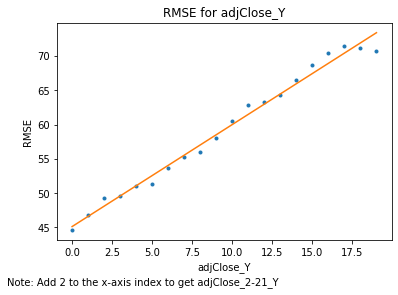

In [8]:
# Plot the RMSE for adjClose
x = np.arange(20)
y = rmse[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('RMSE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()

In [9]:
# Evaluate MAE
mae = mean_absolute_error(y_test, ypred, multioutput='raw_values')

# For each value in mae
for i in range(1, len(mae)+1):

    # Print the MAE values for adjClose
    if i < 21:
        print("The MAE for adjClose_{}_Y = ".format(i+1), mae[i-1])

    # Print the MAE values for min day
    elif 21 <= i < 25:
        print("The MAE for {}day_min = ".format((i-20)*5), mae[i-1])

    # Print the MAE for max day
    else:
        print("The MAE for {}day_max = ".format((i-24)*5), mae[i-1])

The MAE for adjClose_2_Y =  22.169737127957614
The MAE for adjClose_3_Y =  24.405476444020337
The MAE for adjClose_4_Y =  24.80540343368393
The MAE for adjClose_5_Y =  23.464602872170897
The MAE for adjClose_6_Y =  23.70684610178898
The MAE for adjClose_7_Y =  22.90424054261034
The MAE for adjClose_8_Y =  23.35051411359194
The MAE for adjClose_9_Y =  24.306123665836264
The MAE for adjClose_10_Y =  24.713212829369525
The MAE for adjClose_11_Y =  24.903082054964887
The MAE for adjClose_12_Y =  26.71209665209761
The MAE for adjClose_13_Y =  26.87740228587631
The MAE for adjClose_14_Y =  27.42507548865737
The MAE for adjClose_15_Y =  29.437389119862974
The MAE for adjClose_16_Y =  29.60121560727814
The MAE for adjClose_17_Y =  31.220885699087777
The MAE for adjClose_18_Y =  32.34998172080766
The MAE for adjClose_19_Y =  32.93583319794796
The MAE for adjClose_20_Y =  31.312893473674286
The MAE for adjClose_21_Y =  29.862636411392643
The MAE for 5day_min =  1.3815039777393086
The MAE for 10d

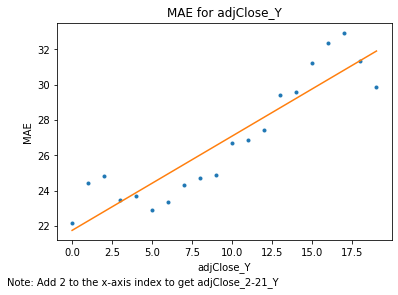

In [10]:
# Plot the MAE for adjClose
x = np.arange(20)
y = mae[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('MAE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('MAE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()